<a href="https://colab.research.google.com/github/Dyouvrean/STATS-503-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import missingno as msno
from collections import Counter
import xml.etree.ElementTree as ET
from datetime import datetime
pd.options.display.max_seq_items = 2000

# Load Data


*   tables_names - list all the table name in the database
*   Team_attribute
*   Team
*   League - league and country info
*   Match - Match table with 115 variables
*   Player - information about Player 



In [2]:
database = '/content/drive/MyDrive/STATS503/Project/database.sqlite'
conn = sql.connect(database)


tables_names = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables_names

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
team_attr=pd.read_sql("""SELECT *
                        FROM Team_Attributes"""
                        , conn)

team_attr.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

In [4]:
team=pd.read_sql("""SELECT *
                        FROM Team"""
                        , conn)

team.columns

Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')

In [5]:
league=pd.read_sql("""SELECT *
                        FROM Country C, League L
                        WHERE C.id= L.country_id;""", conn)
league= league.loc[:,~ league.columns.duplicated()].copy()
league

,id,name,country_id
0,1,Belgium,1
1,1729,England,1729
2,4769,France,4769
3,7809,Germany,7809
4,10257,Italy,10257
5,13274,Netherlands,13274
6,15722,Poland,15722
7,17642,Portugal,17642
8,19694,Scotland,19694
9,21518,Spain,21518


In [6]:
Match = pd.read_sql("""SELECT * , C.name country, L.name League
                       FROM  Match M ,Country C, League L
                       WHERE C.id= L.country_id AND 
                             M.country_id=C.id AND M.league_id= L.id
                       ;""", conn)
Match = Match.loc[:,~Match.columns.duplicated()].copy()
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [7]:
Player = pd.read_sql("""SELECT DISTINCT * 
                       FROM  Player P, Player_Attributes PA
                       WHERE P.player_api_id= PA.player_api_id
                       ;""", conn)
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,39902,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,39902,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,39902,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,39902,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [8]:
Player = Player .loc[:,~Player .columns.duplicated()].copy()
Player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

# EDA

## Get the formation of team 
* get formation of the team 
* get the result of each match 
* process the xml string to list of dictionary structure

### Get the formation of the team 

In [9]:
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [10]:
def get_formation(row,home):
    home_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    away_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    formations = [None] * 2
    players_y=[home_players_y,away_players_y]
    for i in range(2):
        formation_dict=Counter(players_y[i]);
        sorted_keys = sorted(formation_dict)
        formation = ''
        for key in sorted_keys[1:-1]:
            y = formation_dict[key]
            formation += '%d-' % y
        formation += '%d' % formation_dict[sorted_keys[-1]] 
        formations[i] = formation
    return formations[home]

In [11]:
Match["home_form"]=Match.apply(lambda row: get_formation(row,0),axis=1)
Match["away_form"]=Match.apply(lambda row: get_formation(row,1),axis=1)
Match=Match.drop(['home_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['home_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['country_id','league_id'],axis=1)

### Get the result of each match

In [12]:
# assign match result by comparing the goals of home team and away team 
def match_result(row):
    if row['home_team_goal']> row['away_team_goal']:
      return "HOME"
    elif row['home_team_goal']<row['away_team_goal']:
      return "AWAY"
    else:
      return "DRAW"

In [13]:
Match['result']= Match.apply(lambda row: match_result(row),axis=1)

### process the xml string to list of dictionary structure

In [14]:
def converter(xml_string):
    if xml_string:
       tree = ET.ElementTree(ET.fromstring(xml_string))
       root=tree.getroot()
       data = []

            
       for child in root:
           element_data = {}
           for subelement in child:
               element_data[subelement.tag] = subelement.text
           data.append(element_data)
       return data
    return xml_string

In [15]:
Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']]=Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']].applymap(converter)

## imputation missing value

In [16]:
Match.isna().sum()[Match.isna().sum( )!=0]

home_player_1      1224
home_player_2      1315
home_player_3      1281
home_player_4      1323
home_player_5      1316
home_player_6      1325
home_player_7      1227
home_player_8      1309
home_player_9      1273
home_player_10     1436
home_player_11     1555
away_player_1      1234
away_player_2      1278
away_player_3      1293
away_player_4      1321
away_player_5      1335
away_player_6      1313
away_player_7      1235
away_player_8      1341
away_player_9      1328
away_player_10     1441
away_player_11     1554
goal              11762
shoton            11762
shotoff           11762
foulcommit        11762
card              11762
cross             11762
corner            11762
possession        11762
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA             

<Axes: >

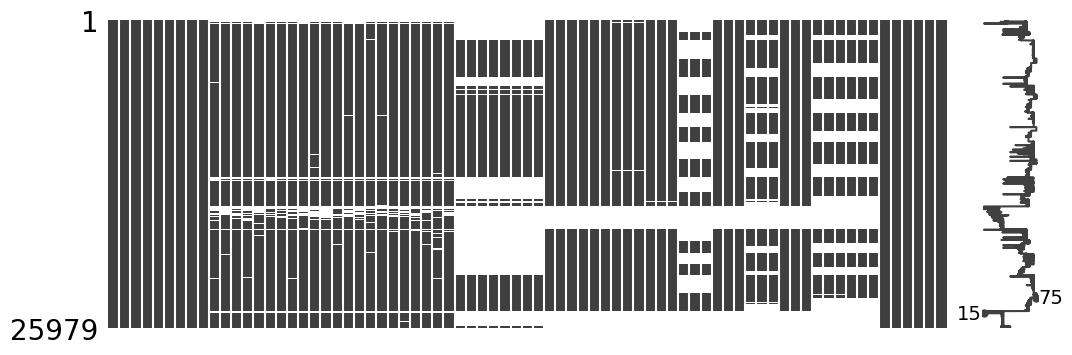

In [17]:
msno.matrix(Match, figsize=(12,4))

<Axes: >

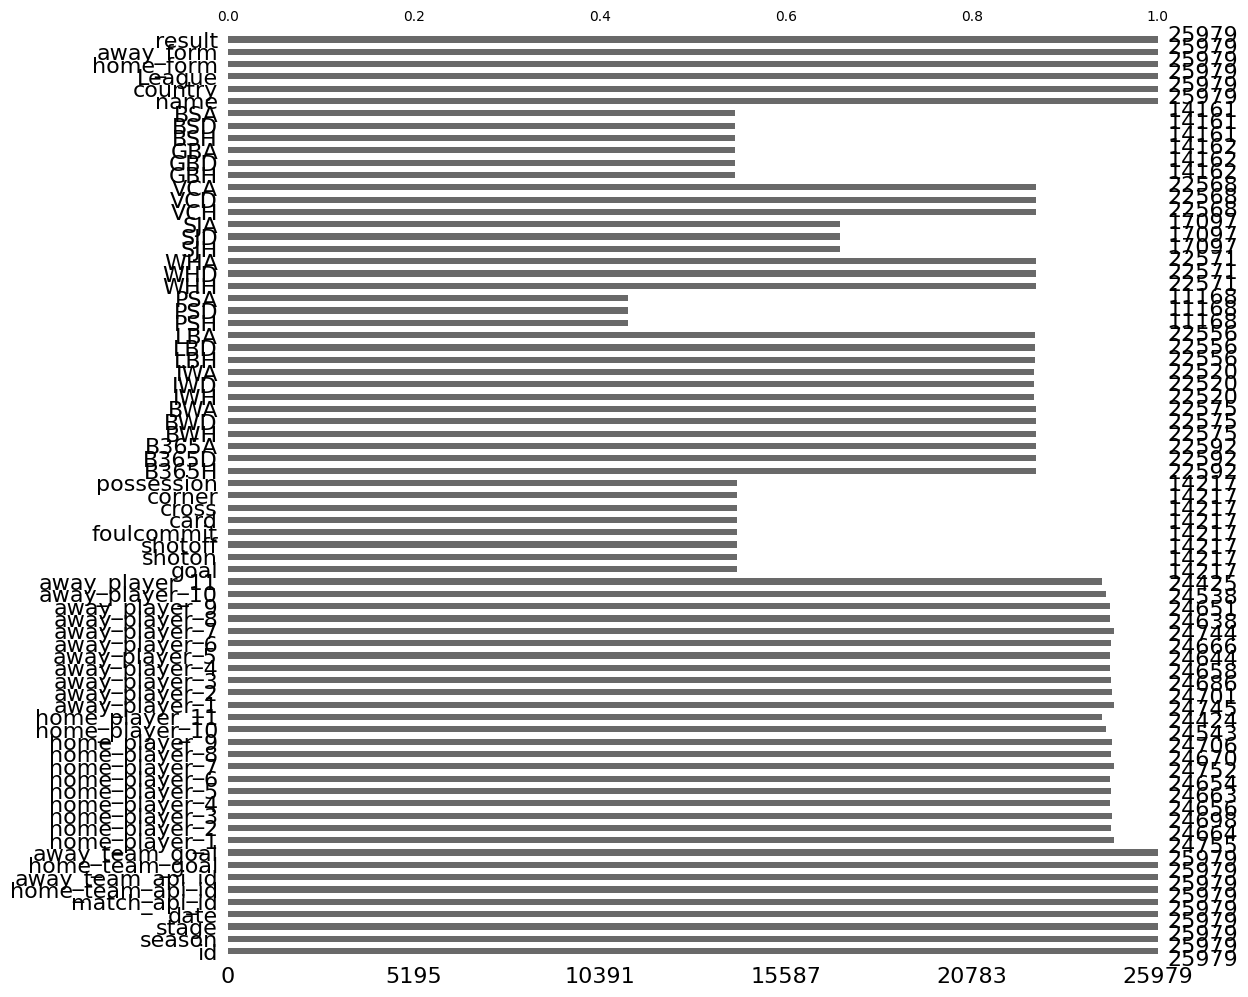

In [18]:
msno.bar(Match, figsize=(12,12))

### Delete the variables missing over 50% of records

In [19]:
null_list= Match.isnull().sum()
total_obs= len(Match)
radio=0.5
to_be_drop=null_list[null_list>total_obs*radio]
to_be_drop.index
Match=Match.drop(to_be_drop.index,axis=1)
Match.isna().sum()[Match.isna().sum( )!=0]

home_player_1      1224
home_player_2      1315
home_player_3      1281
home_player_4      1323
home_player_5      1316
home_player_6      1325
home_player_7      1227
home_player_8      1309
home_player_9      1273
home_player_10     1436
home_player_11     1555
away_player_1      1234
away_player_2      1278
away_player_3      1293
away_player_4      1321
away_player_5      1335
away_player_6      1313
away_player_7      1235
away_player_8      1341
away_player_9      1328
away_player_10     1441
away_player_11     1554
goal              11762
shoton            11762
shotoff           11762
foulcommit        11762
card              11762
cross             11762
corner            11762
possession        11762
B365H              3387
B365D              3387
B365A              3387
BWH                3404
BWD                3404
BWA                3404
IWH                3459
IWD                3459
IWA                3459
LBH                3423
LBD                3423
LBA             

### Drop the rows where players are missing 
From the graph above, the players with missing value is clustered, it is safe to drop the row.

In [20]:
Match=Match.dropna(subset = ['home_player_%d' % i for i in range(1,12)]+['away_player_%d' % i for i in range(1,12)])

## visualization of variable

#### visualized the table of match delete all player id 
* correlation plot

In [21]:
Match_no_player=Match.drop(['home_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['away_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['match_api_id','home_team_api_id','away_team_api_id','country','League','name','id','season','stage','date','home_form','away_form'],axis=1)
Match_bet=Match_no_player.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession'],axis=1)
Match_no_player=Match_no_player.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession','result'],axis=1)
Match_no_player.columns

Index(['home_team_goal', 'away_team_goal', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA'],
      dtype='object')

##### Clustered correlation

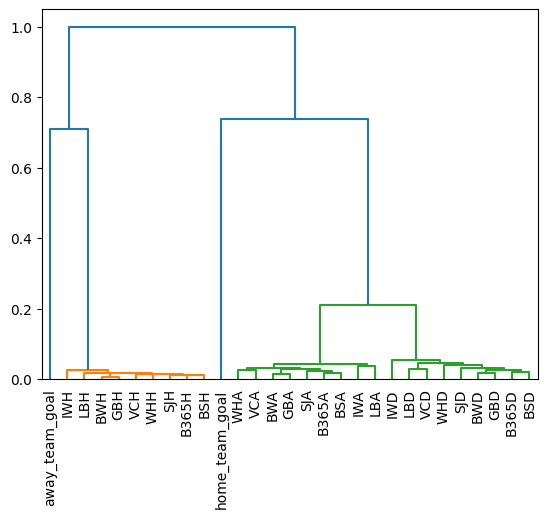

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

correlations = Match_no_player.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=Match_no_player.columns, orientation='top', 
           leaf_rotation=90);

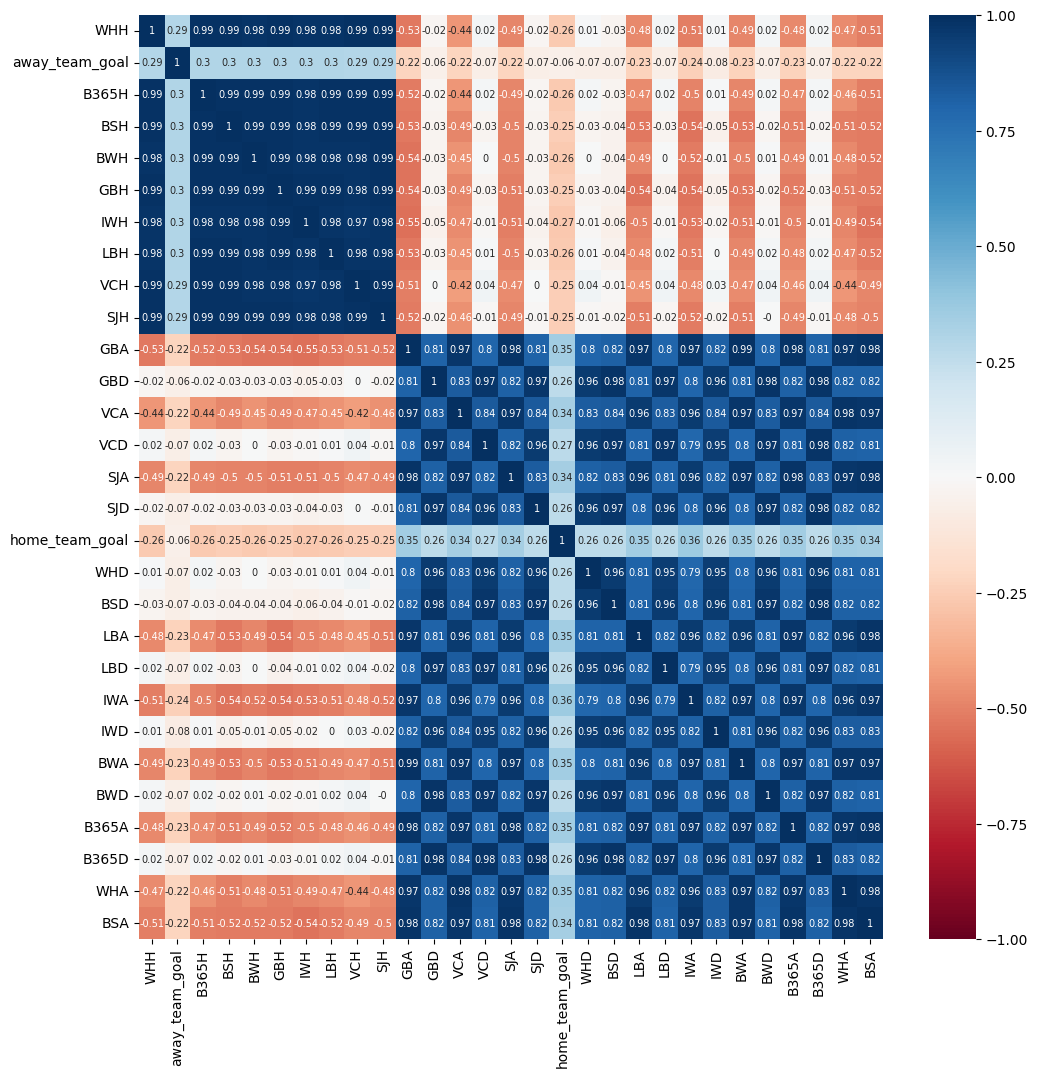

In [23]:
plt.figure(figsize = (12, 12))
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(Match_no_player.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(Match_no_player[i])
    else:
        df_to_append = pd.DataFrame(Match_no_player[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)
  
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

##### unclustered correlation

<Axes: >

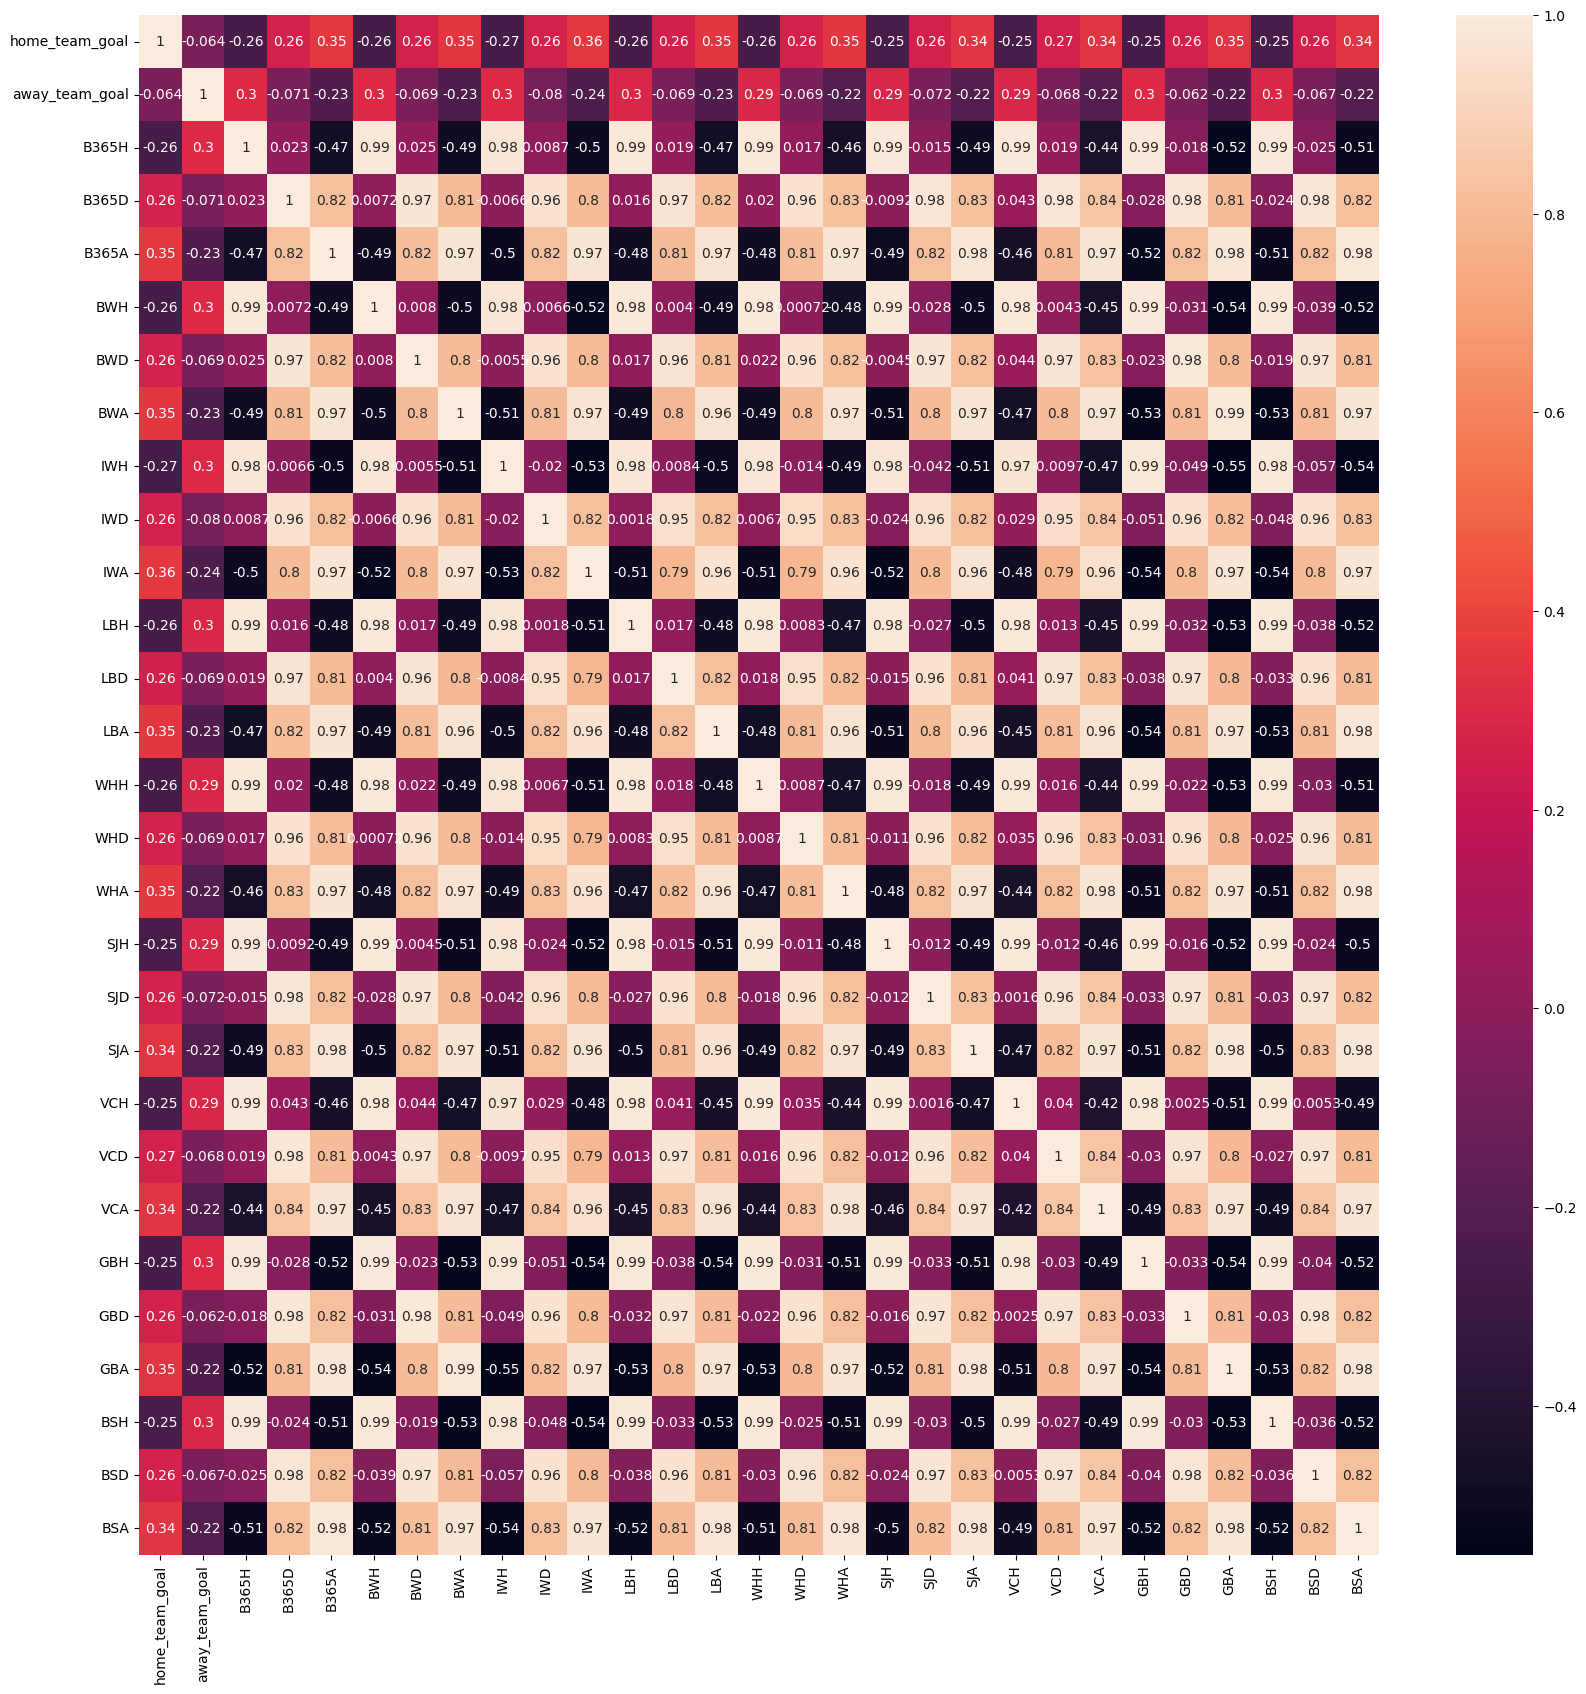

In [24]:
plt.figure(figsize = (20, 20))
sns.heatmap(Match_no_player.corr(), annot = True)

Since the correlation between the betting odds are high, use averge to reduce the features

##### average of betting odds of group(H,D,A)
* H - home tean win
* A- away team win
* D- Draw

preprocessing the null value in the betting odds data 

In [25]:
Match_bet.isnull().sum()

home_team_goal       0
away_team_goal       0
B365H             1683
B365D             1683
B365A             1683
BWH               1699
BWD               1699
BWA               1699
IWH               1739
IWD               1739
IWA               1739
LBH               1712
LBD               1712
LBA               1712
WHH               1696
WHD               1696
WHA               1696
SJH               6747
SJD               6747
SJA               6747
VCH               1705
VCD               1705
VCA               1705
GBH               9520
GBD               9520
GBA               9520
BSH               9518
BSD               9518
BSA               9518
result               0
dtype: int64

<Axes: >

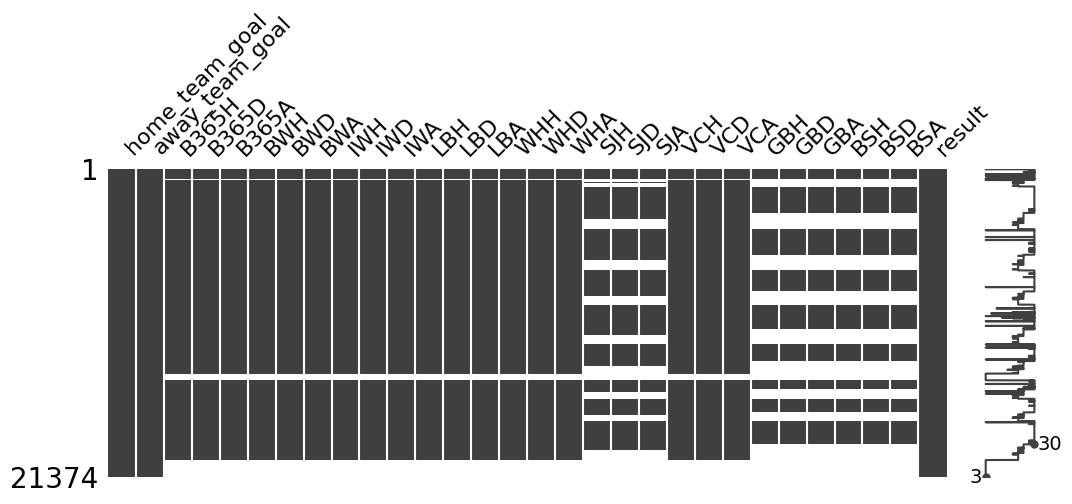

In [26]:
msno.matrix(Match_bet, figsize=(12,4))

In [27]:
target_cols = Match_bet.isna().sum()[Match_bet.isna().sum() > 4000].index.values

In [28]:
Match_bet = Match_bet.drop(target_cols, axis = 1)

In [29]:
Match_bet =Match_bet[~Match_bet.B365H.isna()]

In [30]:
H_odds = ["B365H", "BWH", "IWH", "LBH", "WHH", "VCH","result"]
D_odds = ["B365D", "BWD", "IWD", "LBD", "WHD", "VCD","result"]
A_odds = ["B365A", "BWA", "IWA", "LBA", "WHA", "VCA","result"]

In [31]:
bet_H= Match_bet[H_odds]
bet_D=Match_bet[D_odds]
bet_A= Match_bet[A_odds]

In [ ]:
bet_H["H_avg"]=bet_H.apply(lambda row:np.mean(row[["B365H", "BWH", "IWH", "LBH", "WHH", "VCH"]]),axis=1)
bet_D["D_avg"]=bet_D.apply(lambda row:np.mean(row[["B365D", "BWD", "IWD", "LBD", "WHD", "VCD"]]),axis=1)
bet_A["A_avg"]=bet_A.apply(lambda row:np.mean(row[["B365A", "BWA", "IWA", "LBA", "WHA", "VCA"]]),axis=1)


<ipython-input-32-04278d54a315>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bet_H["H_avg"]=bet_H.apply(lambda row:np.mean(row[["B365H", "BWH", "IWH", "LBH", "WHH", "VCH"]]),axis=1)


In [ ]:
bet_H['id'] = range(len(bet_H))
bet_D['id'] = range(len(bet_D))
bet_A['id'] = range(len(bet_A))

In [ ]:
cor_res=["AWAY","HOME","DRAW"]
col_order=["A_avg","H_avg","D_avg"]
bet_total=pd.concat([bet_H[["H_avg","id","result"]], bet_A["A_avg"],bet_D["D_avg"]], axis=1)
bet_total["Min"]= bet_total.apply(lambda row: cor_res[np.argmin(row[col_order])],axis=1)
bet_total

In [ ]:
bet_total["Correct_guess"]= bet_total.apply(lambda row : "TRUE" if row["result"]== row["Min"] else "FALSE",axis=1)
betcompany=bet_total.groupby("Correct_guess").count().reset_index()
betcompany=betcompany.loc[:,["Correct_guess","Min"]].copy()
betcompany.columns=["Correct_guess","Count"]

In [ ]:
betcompany

In [ ]:
sns.barplot(betcompany,x="Correct_guess",y="Count")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7), sharey = True)
sns.boxplot(data = bet_H, x = "result", y = "H_avg",ax = axes[0])
sns.boxplot(data = bet_D, x = "result", y = "D_avg",ax = axes[1])
sns.boxplot(data = bet_A, x = "result", y = "A_avg",ax = axes[2])

Due to the high correlation among the betting odds from 11 different company, each company provides home team win odd, away team win odd and draw odd. So, we break these 33 odds to corresponding win betting odds group and take average of them. For each match, the one with lowest betting odd is considered as the most likely win team by betting company. 

The betting company have more correct guess than the wrong guess by 6%

Also, the above box plot is intuitively true. 
Thus, according to these evidence, betting odds should be considered as a important feature

### Match result distribution 

#### general distribution of Match result

In [ ]:
# Visulize the match result ,which is a little imbalanced  
sns.histplot(Match['result'])

From the plot above, it shows us that the Home team may have more chance to win

#### Match result of each league

In [ ]:
match_hist=Match[["League","result"]].groupby("League").value_counts().reset_index()
match_hist.columns=["league","result","count"]
match_hist

In [ ]:
graph = sns.FacetGrid(match_hist, col ="league")
graph.map(plt.bar ,"result","count",edgecolor ="w",alpha=0.7,width=0.4).add_legend()
plt.show()

In [ ]:
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="HOME"], y= "League")
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="AWAY"], y= "League")
sns.histplot(Match[["League","result"]][Match[["League","result"]].result=="DRAW"], y= "League")

As the plot showed above, for all leagues, the home tean is more likely to win.

#### check if there is correlation between sum of player score and win rate

In [ ]:
player_in_match=Match[['home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11','date']]

In [ ]:
Player.columns

In [ ]:
def cal_player_rating(row):
    date=pd.to_datetime(row['date'])
    home=[row['home_player_%d' % i] for i in range(1,12)]
    away=[row['away_player_%d' % i] for i in range(1,12)]
    home_pd= Player[Player.player_api_id.isin(home)][["overall_rating","date",'player_api_id']]
    home_pd['recent']= abs(pd.to_datetime(home_pd['date'])-date)
    away_pd= Player[Player.player_api_id.isin(away)][["overall_rating","date",'player_api_id']]
    away_pd['recent']= abs(pd.to_datetime(away_pd['date'])-date)
    home_score= sum(home_pd.groupby("player_api_id").min().reset_index()["overall_rating"])
    away_score= sum(away_pd.groupby("player_api_id").min().reset_index()["overall_rating"])

    return home_score,away_score

In [ ]:
cal_player_rating(player_in_match.iloc[0])

Match["home_score"]=Match.apply(lambda row: cal_player_rating(row)[0],axis=1)
Match["away_score"]=Match.apply(lambda row: cal_player_rating(row)[1],axis=1)
Match

In [ ]:
# sns.scatterplot(Match,y="home_score",x='date', hue ='result')

# graph = sns.FacetGrid(Match, col ="League",  hue ="result", col_wrap=3)
# graph.map(plt.scatter ,"League",'home_score',edgecolor ="w").add_legend()
# plt.show()
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)

sns.scatterplot(data=Match[Match.result!="DRAW"],x="id",y="home_score",hue="result",ax = axes[0])
sns.scatterplot(data=Match[Match.result!="DRAW"],x="id",y="away_score",hue="result",ax = axes[1])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)
sns.boxplot(data = Match, x = "home_score", y = "League", showfliers = False, ax = axes[0])
axes[0].set_xlabel("Score", fontsize = 15)
axes[0].set_ylabel("League", fontsize = 15)
axes[0].set_title("Home team overall score", fontsize = 20)

sns.boxplot(data = Match, x = "away_score", y = "League", showfliers = False, ax = axes[1])
axes[1].set_xlabel("Score", fontsize = 15)
axes[1].set_ylabel("League", fontsize = 15)
axes[1].set_title("Away team overall score", fontsize = 20)
plt.tight_layout()

From the plot above, the overall score of player don't have large difference

In [ ]:
Score= Match.loc[:,["home_score","id","League","result"]]
Score["pos"]="home"

Score_away= Match.loc[:,["away_score","id","League","result"]]
Score_away["pos"]="away"

Score.columns=["Score","id","League","result","pos"]
Score_away.columns=["Score","id","League","result","pos"]
Score_total=pd.concat([Score, Score_away])

In [ ]:
# sns.scatterplot(Score_total,y="Score",x='id', hue ='pos')
fig, axes = plt.subplots(1, 3, figsize = (20, 5), sharey = True)
sns.boxplot(data =Score_total[Score_total.result=="HOME"], x = "Score", y = "League", hue="pos",ax = axes[0])
axes[0].legend(title='Type', fontsize='6', title_fontsize='7')
axes[0].set_title("Home team WIN ", fontsize = 9)
sns.boxplot(data =Score_total[Score_total.result=="AWAY"], x = "Score", y = "League", hue="pos",ax = axes[1])
axes[1].set_title("AWAY team WIN ", fontsize = 9)
axes[1].legend(title='Type', fontsize='6', title_fontsize='7')
sns.boxplot(data =Score_total[Score_total.result=="DRAW"], x = "Score", y = "League", hue="pos",ax = axes[2])
axes[2].set_title("DRAW ", fontsize = 9)
axes[2].legend(title='Type', fontsize='6', title_fontsize='7')

In [ ]:
graph = sns.FacetGrid(Score_total[Score_total.result=="HOME"], col ="League", row="pos")
graph.map(plt.scatter ,"id",'Score',edgecolor ="w",alpha=0.3).add_legend()
plt.show()


However, after partition the all match into 3 parts by match result, it shows that the overall score of player fromwinning team is slightly better than the other one. As for the DRAW plot, the overall score looks similar. Thus, we consider the player overall score is a relative feature.

#### check the formation of team 

In [ ]:
Match_form= Match[["League",'home_form','away_form','result']]

In [ ]:
Match_form.groupby(["League",'home_form','away_form']).count().reset_index()

In [ ]:
np.sum(Match_form["home_form"]!=Match_form["away_form"])

After exploring the formation data, it occurs that along all the match, the formation of home team and away team are the same. Thus, the formation info may not useful, which will not be used in prediction

#### The team who win most number of match and who win most 

##### compare all the team 

In [ ]:
Match.columns

In [ ]:
Match_team= Match[['home_team_api_id','away_team_api_id','result','League']]

In [ ]:
team_name= team[["team_api_id","team_long_name"]]

In [ ]:
home_team_name=team_name.copy()
home_team_name.columns=["home_team_api_id","home_team_long_name"]
home_team_name

away_team_name=team_name.copy()
away_team_name.columns=["away_team_api_id","away_team_long_name"]
away_team_name

In [ ]:
Match_team= pd.merge(Match_team, home_team_name, how='inner', on = 'home_team_api_id')
Match_team= pd.merge(Match_team, away_team_name, how='inner', on = 'away_team_api_id')
Match_team

In [ ]:
def get_winner(row):
  if row["result"]== "HOME":
     return row["home_team_long_name"]
  elif row["result"]== "AWAY":
     return row["away_team_long_name"]
  else:
    return "TIE"

In [ ]:
Match_team["Winner"]=Match_team.apply(lambda row: get_winner(row),axis=1)

In [ ]:
win_dict=Match_team["Winner"].value_counts().to_dict()

In [ ]:
home_dict=Match_team["home_team_long_name"].value_counts().to_dict()
home_dict

In [ ]:
away_dict=Match_team["away_team_long_name"].value_counts().to_dict()
away_dict

In [ ]:
win_rate={}
match_counts={}
league_dict={}
for key,value in home_dict.items():
    num_match= value+away_dict[key]
    league_dict[key]=Match_team[Match_team["home_team_long_name"]==key]["League"].unique()[0]
    match_counts[key]= num_match
    if key in win_dict.keys():
      win_rate[key]=win_dict[key]/num_match
    else:
      win_rate[key]=0

win_rate

In [ ]:
win_dist=pd.DataFrame([win_rate,match_counts,league_dict]).T.reset_index()
win_dist.columns=["team_name","rate","number_of_match","league"]
win_dist

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot(win_dist.sort_values(by=['rate'],ascending=False).iloc[0:40,:],y='team_name',x="rate",ax=axes[0])
sns.barplot(win_dist.sort_values(by=['number_of_match'],ascending=False).iloc[0:40,:],y='team_name',x="number_of_match",ax=axes[1])

axes[0].set_title("Top 40 winning rate team in general", fontsize = 20)
axes[1].set_title("Top 40 team attending match number in general", fontsize = 20)

The above plot show the winning rate of each team. The team "FC Barcelona" has the highest winning rate,while the number of match among these team are similar

In [ ]:
top=win_dist.sort_values(by=['rate'],ascending=False).iloc[0,:]
last=win_dist.sort_values(by=['rate'],ascending=False).iloc[-1,:]
top

In [ ]:
top_id=team[team.team_long_name==top.team_name].reset_index()["team_api_id"][0]
last_id=team[team.team_long_name==last.team_name].reset_index()["team_api_id"][0]

top_attr= team_attr[team_attr.team_api_id==top_id]
top_attr["team_name"]= top.team_name
last_attr=team_attr[team_attr.team_api_id==last_id]
last_attr["team_name"]= last.team_name


In [ ]:
comb=pd.concat([top_attr,last_attr])
comb=comb.groupby("team_name").mean()[['buildUpPlaySpeed',
                                         'buildUpPlayPassing','chanceCreationPassing',
                                         'chanceCreationCrossing', 'chanceCreationShooting',
                                         'defencePressure', 'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar",figsize=(10,10))
plt.title('Comparison between the numberical measurement of team attributes of top team and buttom team.')

From the comparison of top team and buttom team, it shows there are significant difference on the feature,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationCrossing,defencePressure. It is reasonable to assume these feature are correlated to the game result

##### compare the team in the corresponding league group

In [ ]:
league_win=win_dist.groupby("league").value_counts().reset_index().drop([0],axis=1)
league_win

In [ ]:
le_list= list(win_dist["league"].value_counts().to_dict().keys())
le_list

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (40, 30))
Top_team={}
buttom_team={}
for i in range(len(le_list)):
  league_name= le_list[i]
  target_set= win_dist[win_dist.league== league_name].sort_values(by=['rate'],ascending=False)
  Top_team[league_name]= target_set.iloc[0,:]
  buttom_team[league_name]= target_set.iloc[-1,:]
  sns.barplot(target_set,y='team_name',x="rate",ax=axes[int(i/3),i%3])
  axes[int(i/3),i%3].set_title("The winning rate order of team from "+league_name, fontsize = 20)

As the plot given above, we can see there are large difference of winnning rate between the top team and buttom team from each league. Thus, it seems to be resonable to explore the team attribute of top team and buttom team in order to find out useful feature 

In [ ]:
Top_team=pd.DataFrame(Top_team).T
Top_team

In [ ]:
buttom_team=pd.DataFrame(buttom_team).T
buttom_team

In [ ]:
# extract the year from date 
team_attr['date'] = pd.DatetimeIndex(team_attr['date']).year

In [ ]:
team_attr.isnull().sum()

Since there are 969 missing value from buildUpPlayDribbling column, it is safe to delete the column

In [ ]:
team_attr= team_attr.drop('buildUpPlayDribbling', axis=1)

In [ ]:
team_attr.info()

In [ ]:
Match.columns

In [ ]:
team_score_dist=Match[["home_team_api_id",'away_team_api_id','League','result', 'home_score', 'away_score']]
team_score_dist

In [ ]:
team_score_dist= pd.merge(team_score_dist, home_team_name, how='inner', on = 'home_team_api_id')
team_score_dist= pd.merge(team_score_dist, away_team_name, how='inner', on = 'away_team_api_id')
team_score_dist=team_score_dist.drop(["home_team_api_id","away_team_api_id"],axis=1)
team_score_dist

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (50, 40))
for i in range(len(le_list)):
    target= team_score_dist[team_score_dist.League== le_list[i]]
    team_home_score=target[["home_team_long_name","home_score"]]
    team_away_score=target[["away_team_long_name","away_score"]]
    target_team_names= np.union1d(target["home_team_long_name"].unique(),target["away_team_long_name"].unique())
    concate_score= pd.DataFrame()
    for j in target_team_names:
      first= team_home_score[team_home_score.home_team_long_name==j ]
      first.columns= ["team_name","score"]
      second= team_away_score[team_away_score.away_team_long_name==j ]
      second.columns= ["team_name","score"]
      concate_score=pd.concat([concate_score, first], axis=0)
      concate_score=pd.concat([concate_score, second], axis=0)
    sns.boxplot(concate_score,x="score",y="team_name",ax=axes[int(i/3),i%3])
    axes[int(i/3),i%3].set_title("The overall score statistic of teams from "+le_list[i], fontsize = 20)
